Image dimensions: (1024, 1280, 4)
<class 'float'>


<function matplotlib.pyplot.show(close=None, block=None)>

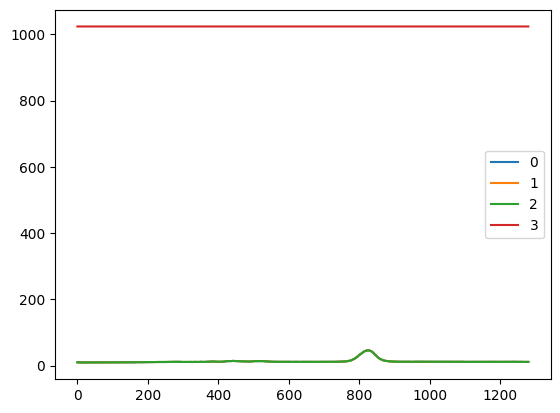

In [79]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

img = mpimg.imread(r"Z:\Beam Profiles with Camera\02-09_Input\image_3.png")

print('Image dimensions:', img.shape)

print(type(float(img.shape[2])))
for i in range(img.shape[2]):
    plt.plot(img[:,:,i].sum(axis=0), label=i)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

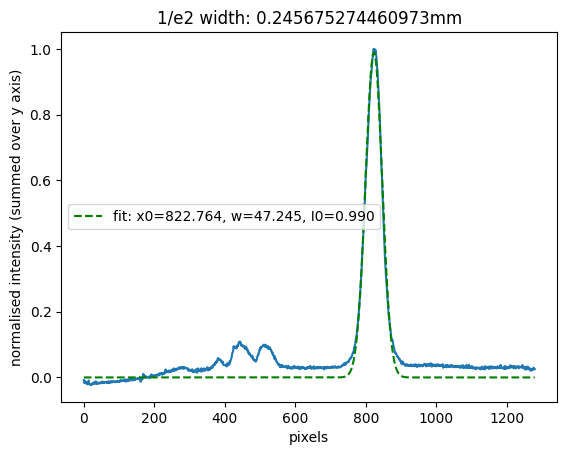

In [80]:
from scipy.optimize import curve_fit

intensity = img[:,:,2].sum(axis=0)
pixel = np.arange(intensity.shape[0])
noise = np.average(intensity[0:300])
intensity = intensity-noise
intensity = intensity/np.max(intensity)

plt.plot(pixel,intensity)

def Gaussian(x,x0,w,I0):
    return I0*np.exp( -2*((x-x0)**2)/(w**2) )

popt, pcov = curve_fit(Gaussian, pixel, intensity, bounds=([700,0,0.99],[900,100,1]))

plt.plot(pixel, Gaussian(pixel, *popt), 'g--',
         label='fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt))
plt.legend()
plt.xlabel('pixels')
plt.ylabel('normalised intensity (summed over y axis)')
pixel_length = 5.2e-3 # mm
w_e2 = pixel_length*popt[1]
plt.title('1/e2 width: {}mm'.format(w_e2))
plt.show

